<a href="https://colab.research.google.com/github/dg154/Heart-Disease-Prediction/blob/main/ANN_Heart_Disease_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [6]:
data= pd.read_csv('/content/heart_disease_data (1).csv')

In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
data.shape

(303, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
X = data.drop(columns='target', axis=1)
y= data['target']

In [13]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [15]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=42)

In [20]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 0s 21ms/step - loss: 0.4126 - accuracy: 0.8177 - val_loss: 0.4075 - val_accuracy: 0.8043
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3811 - accuracy: 0.8177 - val_loss: 0.4093 - val_accuracy: 0.8043
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3669 - accuracy: 0.7956 - val_loss: 0.4092 - val_accuracy: 0.8043
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3964 - accuracy: 0.8232 - val_loss: 0.4096 - val_accuracy: 0.8043
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4307 - accuracy: 0.7790 - val_loss: 0.4109 - val_accuracy: 0.8043
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4141 - accuracy: 0.7459 - val_loss: 0.4122 - val_accuracy: 0.8043
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.4342 - accuracy: 0.8011 - val_loss: 0.4139 - val_accuracy: 0.8043
Epoch 8/500
6/6 [=========

In [33]:
# Accuracy score on training data
X_train_prediction = model.predict(X_train)
# Convert predictions to binary (0 or 1) using a threshold (e.g., 0.5)
X_train_prediction_binary = (X_train_prediction > 0.5).astype(int)
training_data_accuracy = accuracy_score(X_train_prediction_binary, y_train)


8/8 [==============================] - 0s 1ms/step


In [34]:
print('Accuracy on Training Data= ', training_data_accuracy)

Accuracy on Training Data=  0.8810572687224669


In [36]:
# Accuracy score on test data
X_test_prediction = model.predict(X_test)
# Convert predictions to binary (0 or 1) using a threshold (e.g., 0.5)
X_test_prediction_binary = (X_test_prediction > 0.5).astype(int)  # Convert to binary
test_data_accuracy = accuracy_score(X_test_prediction_binary, y_test) # Compare binary predictions to binary labels

3/3 [==============================] - 0s 2ms/step


In [37]:
print('Accuracy on Test Data= ', test_data_accuracy)

Accuracy on Test Data=  0.8552631578947368


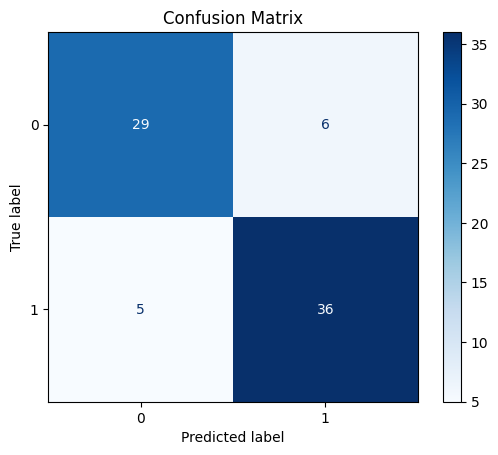

ANN Model Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



In [40]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, X_test_prediction_binary)  # Changed y_pred to X_test_prediction_binary

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, X_test_prediction_binary)  # Changed y_pred to X_test_prediction_binary
print(f'ANN Model Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, X_test_prediction_binary))  # Changed y_pred to X_test_prediction_binary